## Milestone 1
In this exercise, we will analyze House Sales data set in King County. We will use various Exploratory Data Analysis techniques to explore relationships in the data to better understand what variables affect the final sale price of a house more strongly than others.

Some variables that are captured in the data set include: No. of Bedrooms, No. of Bathrooms, Square Footage (living, lot, above, basement, neighbors), Floors, View, Waterfront Property, Condition, Grade, Year Built, Year Renovated, Zip Code, Longitude, Latitude.

For this exercise, we will only look at properties with:
- Sales price less than $2M
- Lot size less than 100,000 sq ft 
- Fewer than 10 bedrooms

**PROBLEM STATEMENTS:** 
1. What are some of the variables that can help us predict a high sales price? 
2. What are some of the characteristics related to a high sale price?

### Import python packages & load data set
Importing necessary packages and loading the King County House Sales data set data set from the UW library (https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
df = pd.read_csv(url)

df['date'] = pd.to_datetime(df['date'].str[0:8])
df['month'] = df['date'].values.astype('datetime64[M]')
df['year'] = pd.DatetimeIndex(df['date']).year

df.where(df['price']<=2000000, inplace= True)
df.where(df['bedrooms']<=10, inplace=True)
df.where(df['sqft_lot']<=100000, inplace= True)

df.dropna(inplace=True)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014-10-01,2014.0
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0,2014-12-01,2014.0
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015-02-01,2015.0
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0,2014-12-01,2014.0
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,2015-02-01,2015.0


### Data set description (numerical variables), data types and find missing values

In [2]:
print('Dataset Description')
print(df.describe())

Dataset Description
                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.095000e+04  2.095000e+04  20950.000000  20950.000000  20950.000000   
mean   4.637343e+09  5.162288e+05      3.359093      2.090489   2035.059618   
std    2.874541e+09  2.859004e+05      0.900765      0.742711    845.498153   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.175100e+09  3.199500e+05      3.000000      1.500000   1410.000000   
50%    4.008400e+09  4.460000e+05      3.000000      2.250000   1890.000000   
75%    7.370350e+09  6.310000e+05      4.000000      2.500000   2506.750000   
max    9.900000e+09  2.000000e+06     10.000000      7.500000   7620.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  20950.000000  20950.000000  20950.000000  20950.000000  20950.000000   
mean   10260.495227      1.489403      0.005442      0.213079      3.410597   
std    11282.265245      0.5403

In [3]:
print('\nData types\n', df.dtypes)

print('\nCheck for missing value\n', df.isnull().any())


Data types
 id                      float64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition               float64
grade                   float64
sqft_above              float64
sqft_basement           float64
yr_built                float64
yr_renovated            float64
zipcode                 float64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
month            datetime64[ns]
year                    float64
dtype: object

Check for missing value
 id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view

### Data Transformation: Calculations & Binnings
Here, we're calculating the age of the house and the age of the house renovation, if the house has been renovated. We're also binning the bathrooms as well as the size (square footage) variables to simplify the data for analysis.

In [4]:
#calculate house age & renovation age when sold
df['age'] = df['year'] - df['yr_built']
df.loc[df['age'] <= 0, 'age'] = 0

df['rnv_age'] = df.loc[df['yr_renovated']!=0, 'year'] - df.loc[df['yr_renovated']!=0, 'yr_renovated']
df.loc[df['yr_renovated']==0, 'rnv_age'] = 0
df.loc[df['rnv_age'] <= 0, 'rnv_age'] = 0

#calculate price per living sq ft
df['price_per_sqft_living'] = df['price'] / df['sqft_living']

#binning: bathroom
nbins = [-1, 1, 2, 3, 4, 5, 6, 7, 8]
nlabels = ['<=1','1.25-2', '2.25-3', '3.25-4', '4.25-5', '5.25-6', '6.25-7', '7.25-8']

df.loc[:, 'bathrooms_bin'] = pd.cut(df.loc[:, 'bathrooms'], bins = nbins, labels = nlabels)


#binning: age
nbins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 200]
nlabels = ['<=10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']

df.loc[:, 'age_bin'] = pd.cut(df.loc[:, 'age'], bins = nbins, labels = nlabels)


#binning: grade
nbins = [-1, 3, 6, 9, 13]
nlabels = ['1-3','4-6', '7-9', '>9']

df.loc[:, 'grade_bin'] = pd.cut(df.loc[:, 'grade'], bins = nbins, labels = nlabels)


#binning: sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15
nbins = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 2000000]
nlabels = ['<1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001-8000','8001-9000','9001-10000','>10000']

df.loc[:, 'sqft_lot_bin'] = pd.cut(df.loc[:, 'sqft_lot'], bins = nbins, labels = nlabels)
df.loc[:, 'sqft_lot15_bin'] = pd.cut(df.loc[:, 'sqft_lot15'], bins = nbins, labels = nlabels)


nbins = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
nlabels = ['<1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001-8000']

df.loc[:, 'sqft_living_bin'] = pd.cut(df.loc[:, 'sqft_living'], bins = nbins, labels = nlabels)


nbins = [-1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
nlabels = ['<1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000','7001-8000','8001-9000','9001-10000']

df.loc[:, 'sqft_above_bin'] = pd.cut(df.loc[:, 'sqft_above'], bins = nbins, labels = nlabels)


nbins = [-1, 1000, 2000, 3000, 4000, 5000]
nlabels = ['<1000','1001-2000','2001-3000','3001-4000','4001-5000']

df.loc[:, 'sqft_basement_bin'] = pd.cut(df.loc[:, 'sqft_basement'], bins = nbins, labels = nlabels)

nbins = [-1, 1000, 2000, 3000, 4000, 5000, 6000]
nlabels = ['<1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000']

df.loc[:, 'sqft_living15_bin'] = pd.cut(df.loc[:, 'sqft_living15'], bins = nbins, labels = nlabels)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,price_per_sqft_living,bathrooms_bin,age_bin,grade_bin,sqft_lot_bin,sqft_lot15_bin,sqft_living_bin,sqft_above_bin,sqft_basement_bin,sqft_living15_bin
0,7.129301e+09,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,188.050847,<=1,51-60,7-9,5001-6000,5001-6000,1001-2000,1001-2000,<1000,1001-2000
1,6.414100e+09,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,209.338521,2.25-3,61-70,7-9,7001-8000,7001-8000,2001-3000,2001-3000,<1000,1001-2000
2,5.631500e+09,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,233.766234,<=1,>80,4-6,9001-10000,8001-9000,<1000,<1000,<1000,2001-3000
3,2.487201e+09,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,308.163265,2.25-3,41-50,7-9,4001-5000,4001-5000,1001-2000,1001-2000,<1000,1001-2000
4,1.954401e+09,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,303.571429,1.25-2,21-30,7-9,8001-9000,7001-8000,1001-2000,1001-2000,<1000,1001-2000


### Histogram

We're plotting the histogram of the main variables in the data set to understand their distributions.

Based on the graphs, we notice that a lot of the variables are skewed to the right (have a long right tail). We have a few properties that have extreme values. Therefore, it might be better for us to use median and inter-quartile range instead of mean and standard deviation due to the skewed distribution.

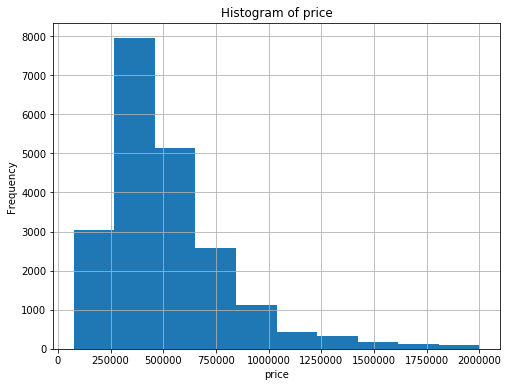

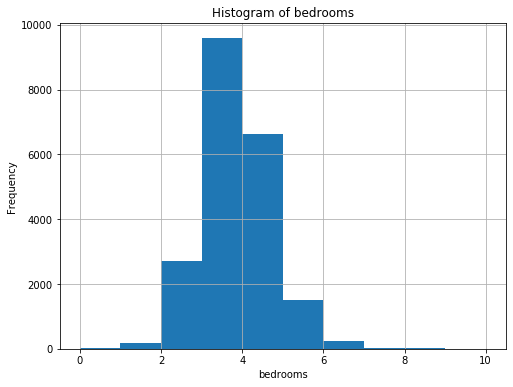

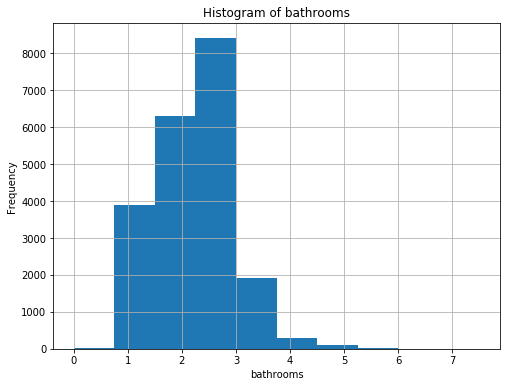

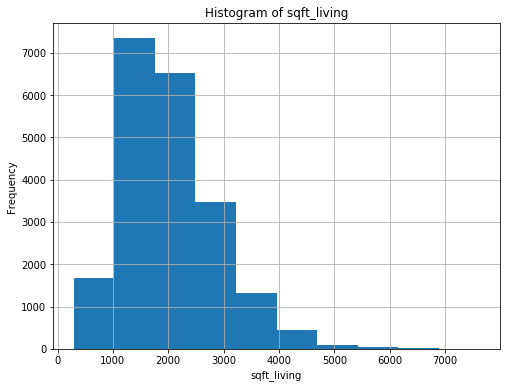

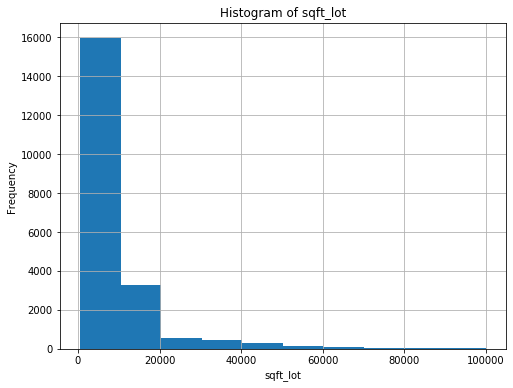

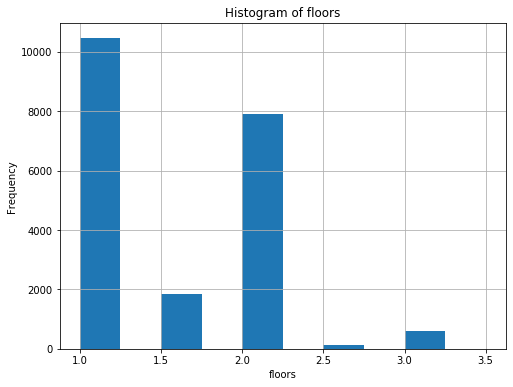

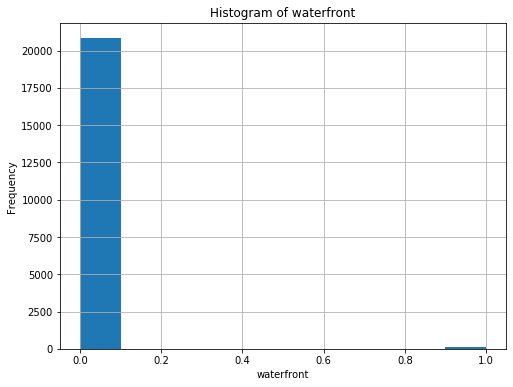

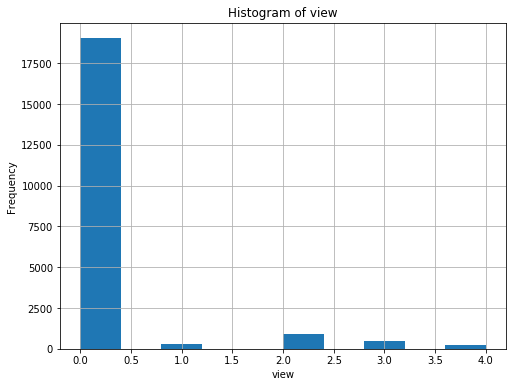

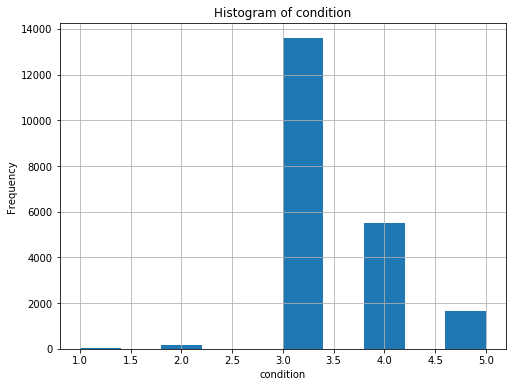

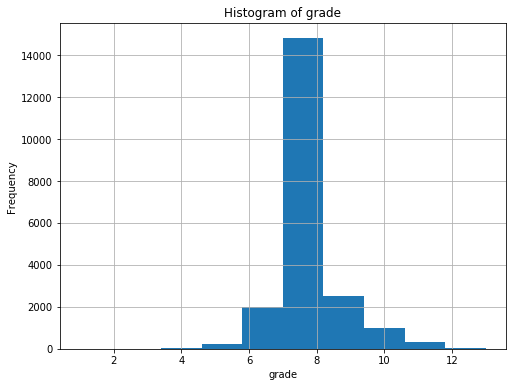

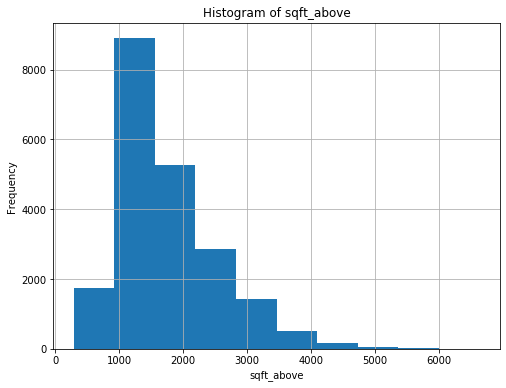

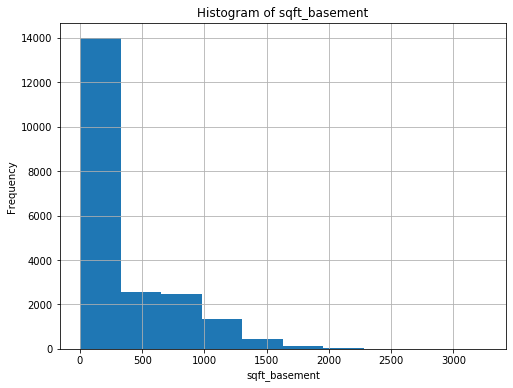

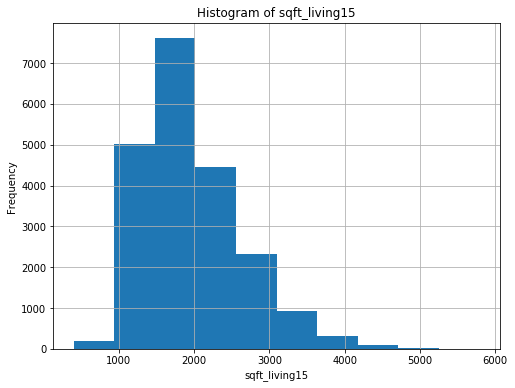

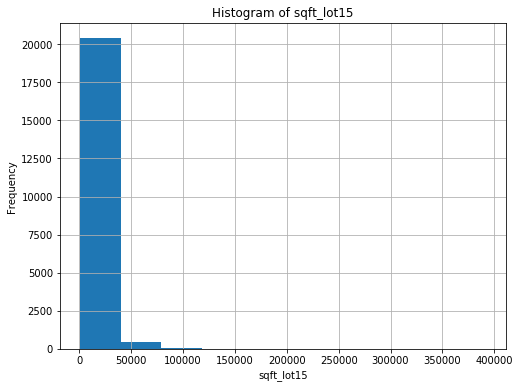

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


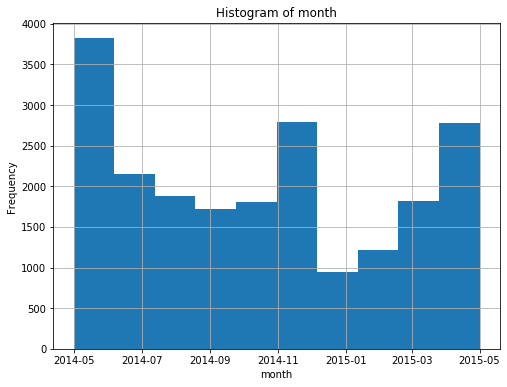

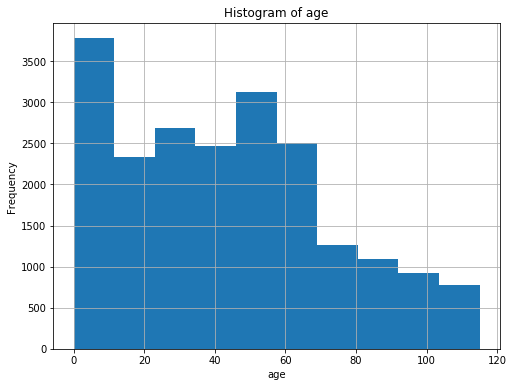

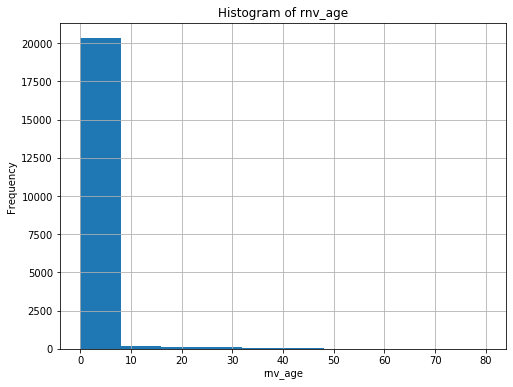

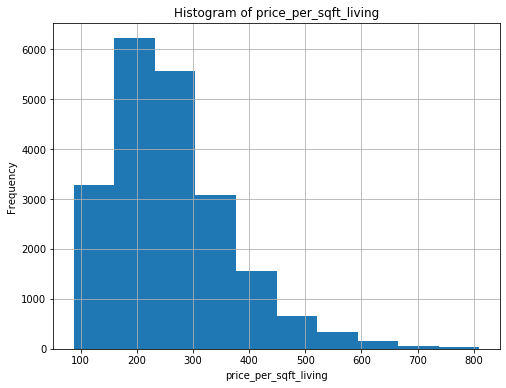

In [5]:
%matplotlib inline 

collist = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'year', 'lat', 'long', 'bathrooms_bin', 
                   'sqft_living_bin', 'sqft_lot_bin', 'sqft_above_bin', 'sqft_basement_bin', 'sqft_living15_bin',
                   'sqft_lot15_bin', 'grade_bin', 'age_bin'], axis=1)

for col in collist:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    
    df[col].hist()
    ax.set_title('Histogram of '+col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

### Hex Plot

We will also use Hex Plot to see the point density and to prevent overplotting (if using scatter plot).

Based on the first hex plot, we can see that we see that the most dense distribution is when livign sq ft is around 1,250-1,500 sq ft and price is around $250,000.

The second hex plot shows that the data is distributed the most dense around grade = 7 and 8 and house age between 50 and 60 years.

Text(0.5, 0, 'Living Sq Ft')

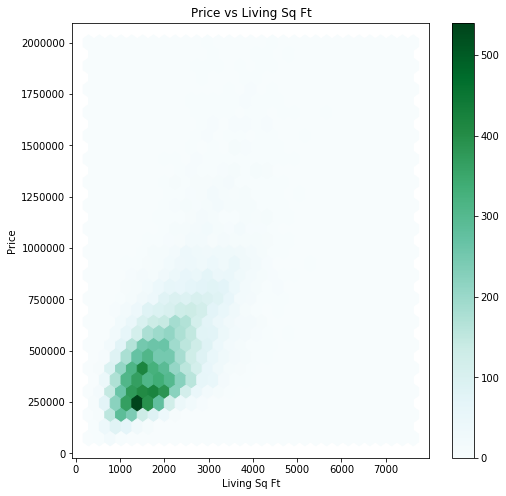

In [6]:
#plotting density (data distribution) of price v living sq ft
ax = plt.figure(figsize=(8,8)).gca()
df.plot.hexbin(x = 'sqft_living', y = 'price', gridsize = 30, ax = ax)
ax.set_title('Price vs Living Sq Ft')
ax.set_ylabel('Price')
ax.set_xlabel('Living Sq Ft')

Text(0.5, 0, 'Age')

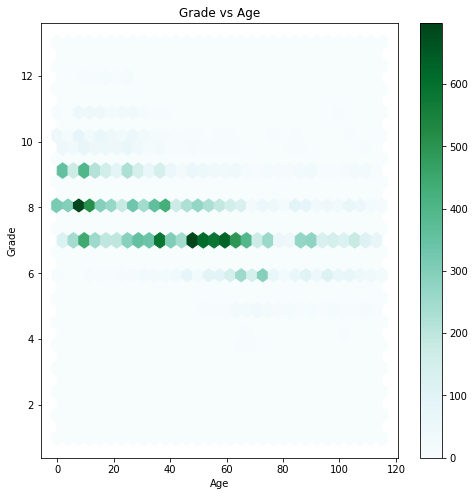

In [7]:
#plotting density (data distribution) of grade v age
ax = plt.figure(figsize=(8,8)).gca()
df.plot.hexbin(x = 'age', y = 'grade', gridsize = 30, ax = ax)
ax.set_title('Grade vs Age')
ax.set_ylabel('Grade')
ax.set_xlabel('Age')

### Bar Chart

We're calculating the median house price by zip code as well as if the house has a basement and plotting the results as a bar chart. 

Based on the table and bar chart below, we notice that the top five most Zip Code with the highest house sales price are 98039, 98004, 98040, 98112 and 98005.
We also notice that having basement leads to a higher median sales price if the the living area is less than 5,000 sq ft. If the house has living area more than 5,000 sq ft, median price tends to be lower for houses with basement.

Top 10 most expensive Zip Code in King County
         med_price_byzip
zipcode                 
98039.0        1450000.0
98004.0        1032250.0
98040.0         980000.0
98112.0         855500.0
98005.0         761225.0
98006.0         752152.5
98075.0         739888.0
98109.0         736000.0
98119.0         727000.0
98102.0         690000.0


Text(0, 0.5, 'Median Price')

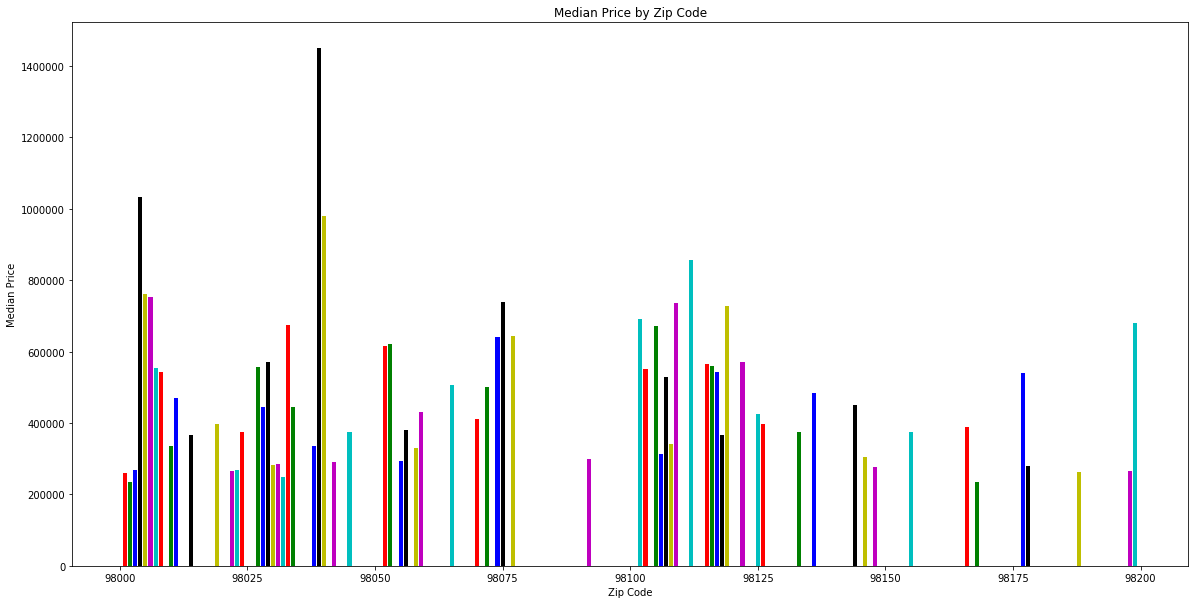

In [8]:
%matplotlib inline 

#calculate median price by zip code
med_zip = pd.DataFrame()
med_zip['med_price_byzip'] = df.groupby('zipcode')['price'].median()

print('Top 10 most expensive Zip Code in King County')
print(med_zip.sort_values(by = ['med_price_byzip'], ascending=False).head(10))

plt.figure(figsize=(20,10))
plt.bar(med_zip.index, med_zip['med_price_byzip'], color='rgbkymc')
plt.title('Median Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Median Price')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


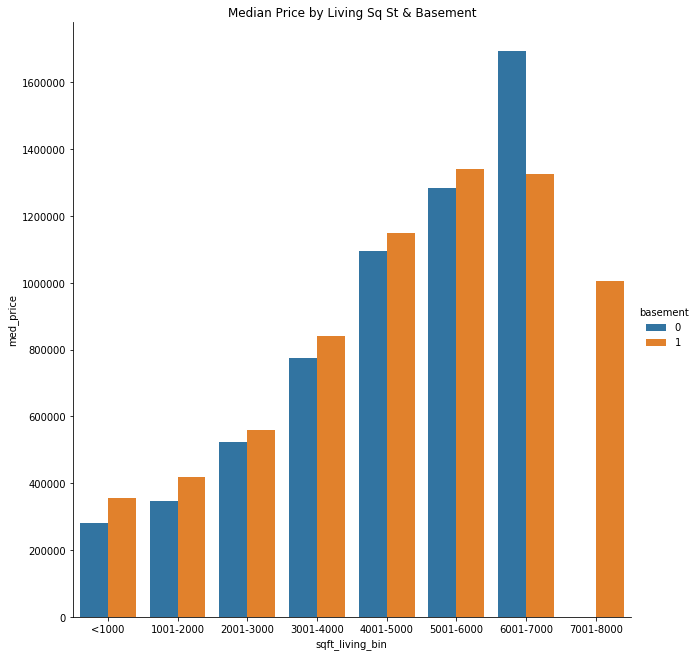

In [9]:
#analyze if having a basement leads to higher sales price
df['basement'] = 0
df.loc[df['sqft_basement']>0,'basement'] = 1

basement = pd.DataFrame()
basement['med_price'] = df.groupby(['sqft_living_bin','basement'])['price'].median()
basement.reset_index(inplace=True)

sns.factorplot(x = 'sqft_living_bin', 
               y='med_price', 
               hue = 'basement', 
               data = basement, 
               kind='bar', 
               height=9,
               aspect=1/1)
plt.title('Median Price by Living Sq St & Basement')
plt.show()

### Line Plots

We're calculating the median house price by sales month and plotting the results as a line plot to see how the median price changes by month.

Based on line plot below, we notice that median sales price is higher in the summer compared to other seasons. This might indicate that, because demand (number of houses sold) is higher in the summer (see Sales Month histogram above), sellers have more bargaining power and are less likely to lower their price.

(0, 500000)

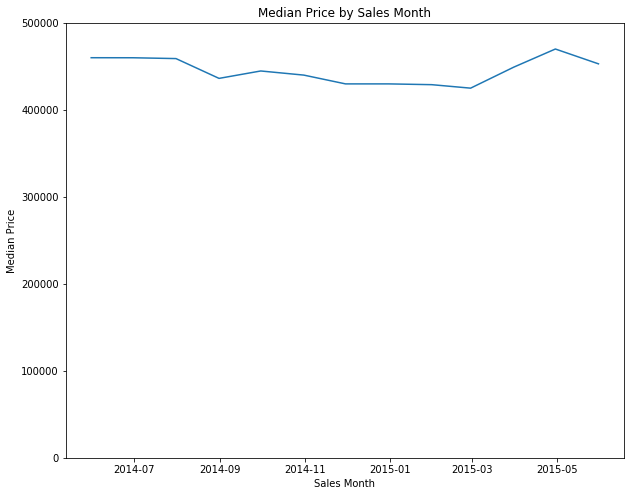

In [10]:
#calculate median price by month
med_month = df[['date', 'price']].set_index('date').resample('M').median()

plt.figure(figsize=(10,8))
plt.plot(med_month.index, med_month)
plt.title('Median Price by Sales Month')
plt.xlabel('Sales Month')
plt.ylabel('Median Price')
plt.ylim(0,500000)

### Box Plots

We're plotting the boxplot of Price v the main variables in the data set. Using boxplot, we can see the Median as well as 1st & 3rd Quartiles.

Based on the boxplots, we can make some prelimirary observations:
- Direct proportionality between Price and: Bedrooms, Bathrooms, Grade, Waterfront, View, Condition, Living Sq Ft
- Inverse proportionality between Price and: Age
- No clear (mixed) proportionality between Price and: Floors, Lot Sq Ft

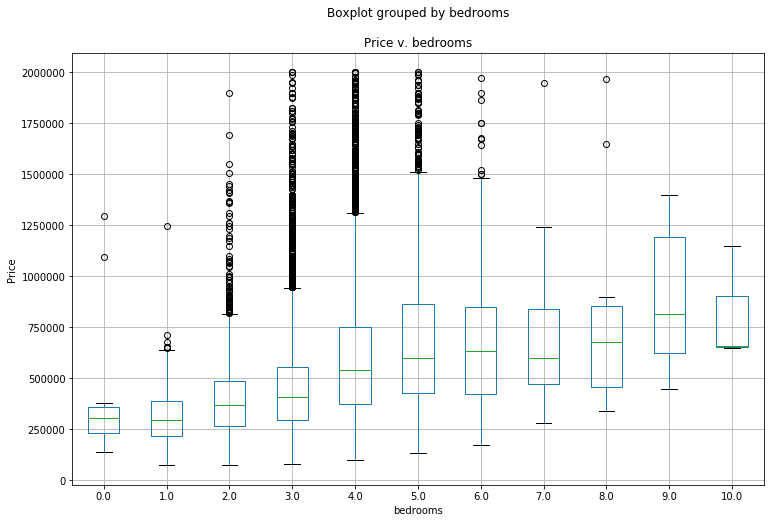

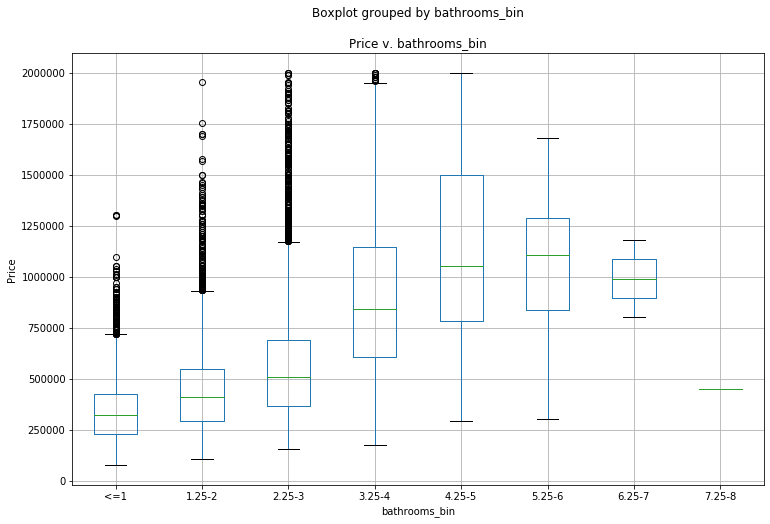

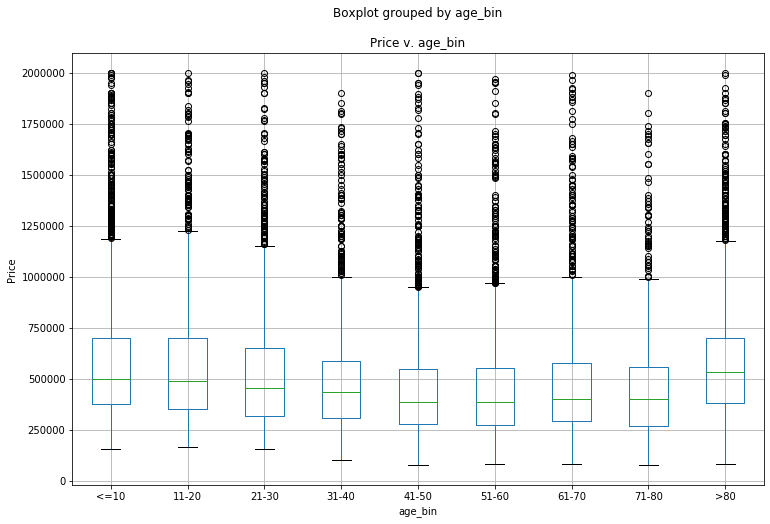

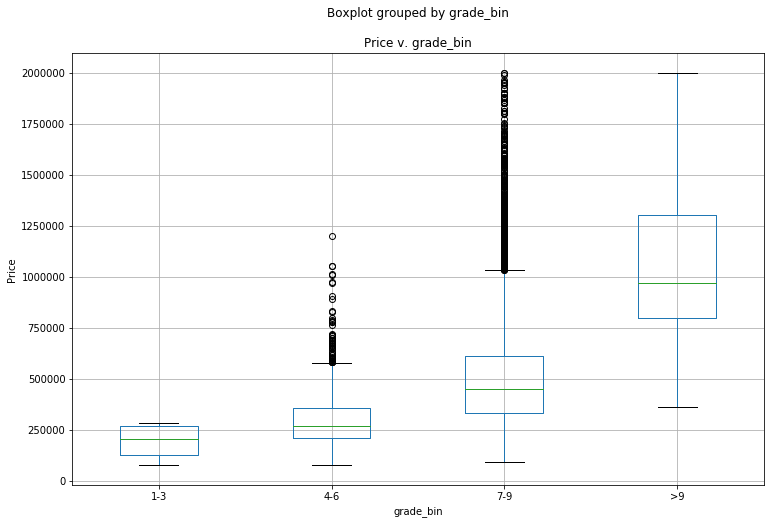

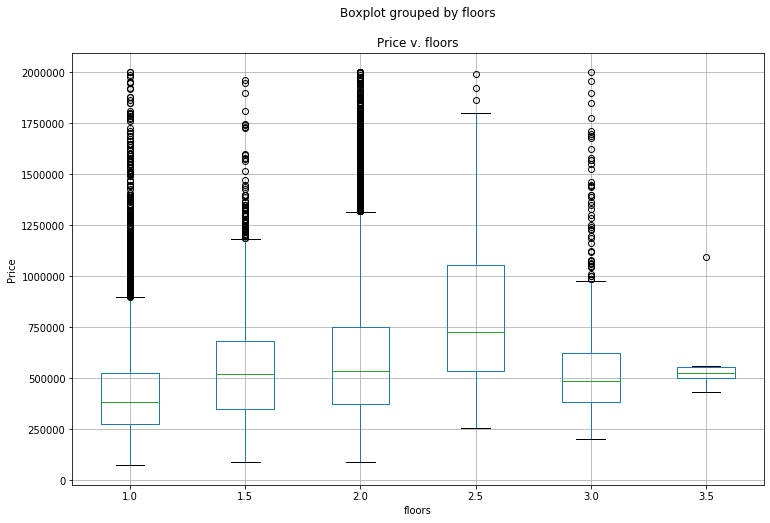

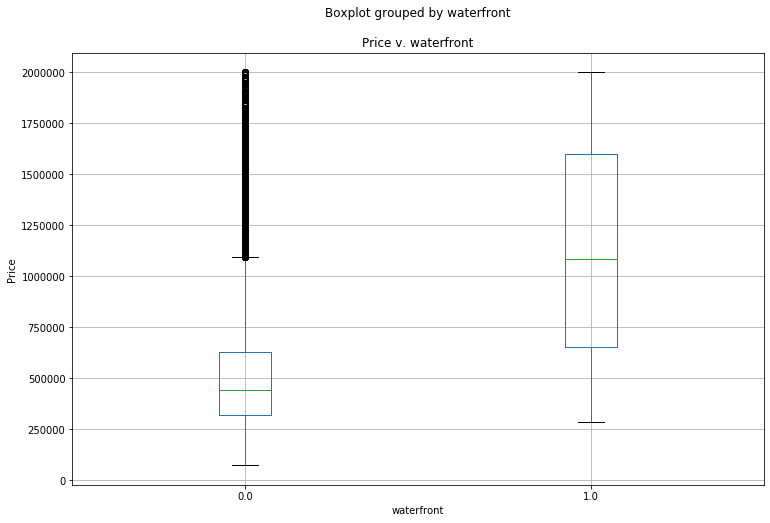

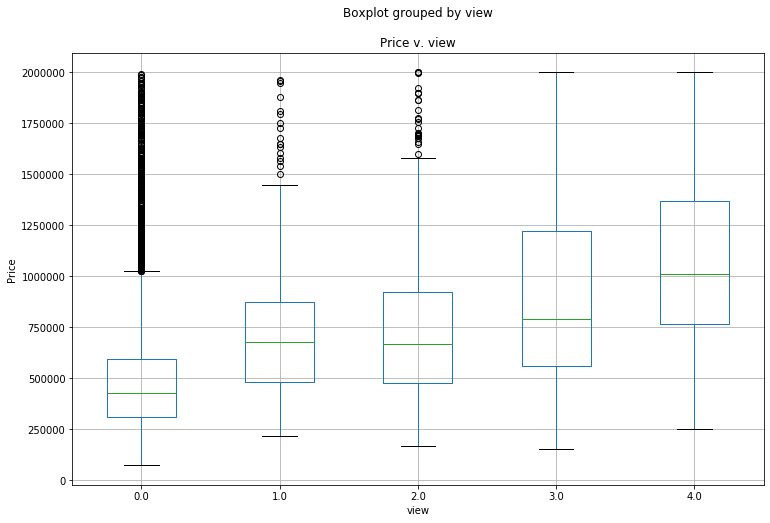

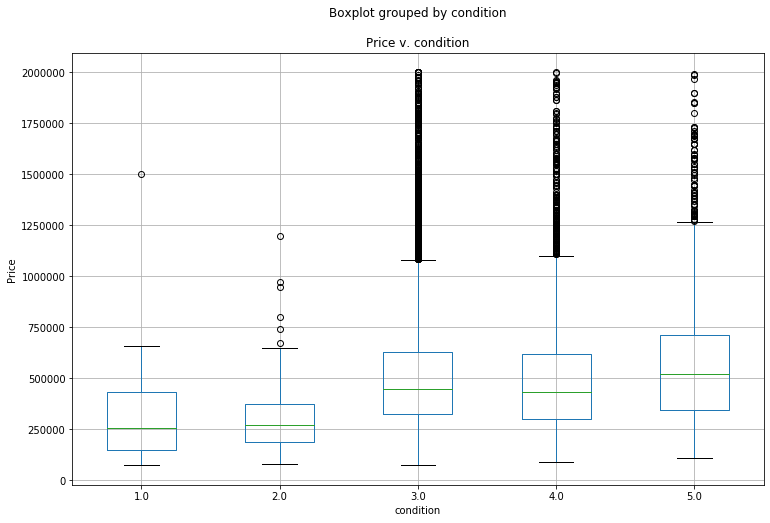

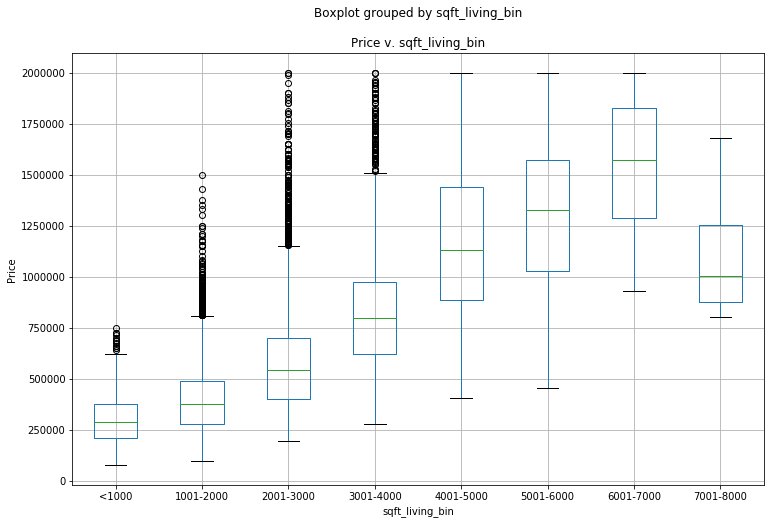

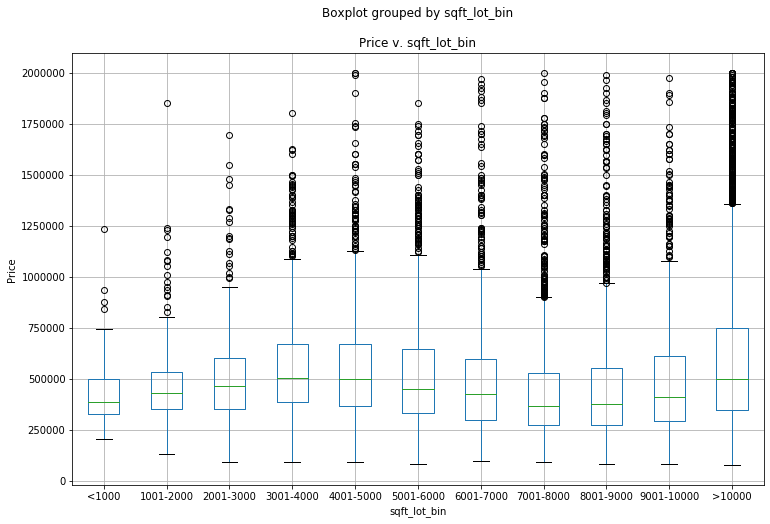

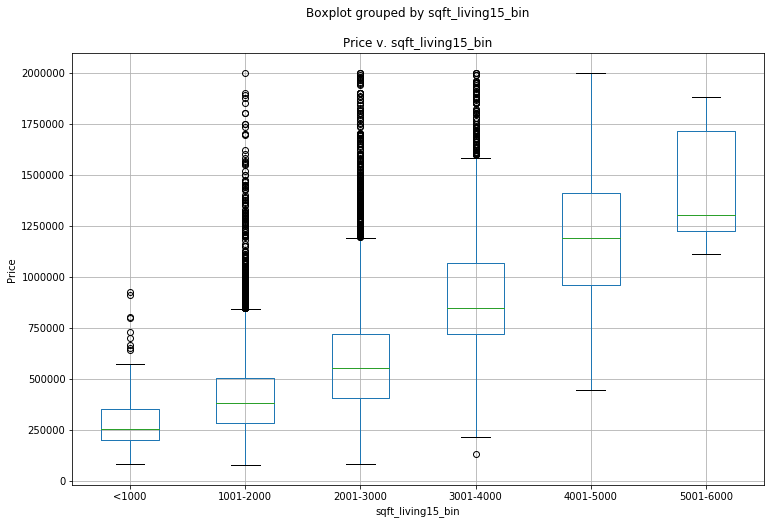

In [11]:
%matplotlib inline 

collist2 = ['bedrooms', 'bathrooms_bin', 'age_bin', 'grade_bin', 'floors', 'waterfront', 'view', 'condition',
            'sqft_living_bin', 'sqft_lot_bin', 'sqft_living15_bin']

for col in collist2:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    
    df.boxplot(column = ['price'], by = col, ax = ax)
    ax.set_title('Price v. '+col)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    plt.show()
    print('\n\n')

### Scatter Plot

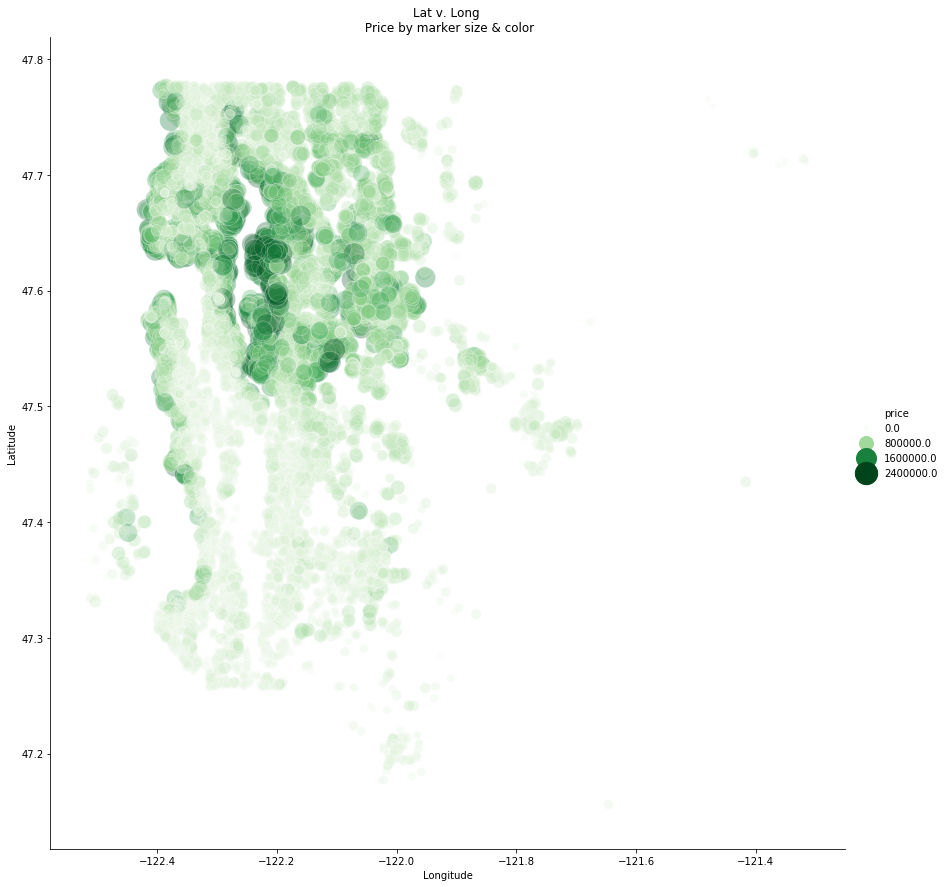

In [12]:
#price by longitude & latitude
ax = sns.relplot(x = 'long', y = 'lat',
                 hue = 'price', palette = 'Greens',
                 size = 'price', sizes = (10.0, 500.0),
                 data = df,
                 height = 12, 
                 aspect = 1/1,
                 alpha = 0.3)
ax.set(title ='Lat v. Long \n Price by marker size & color',
       xlabel = 'Longitude',
       ylabel = 'Latitude')

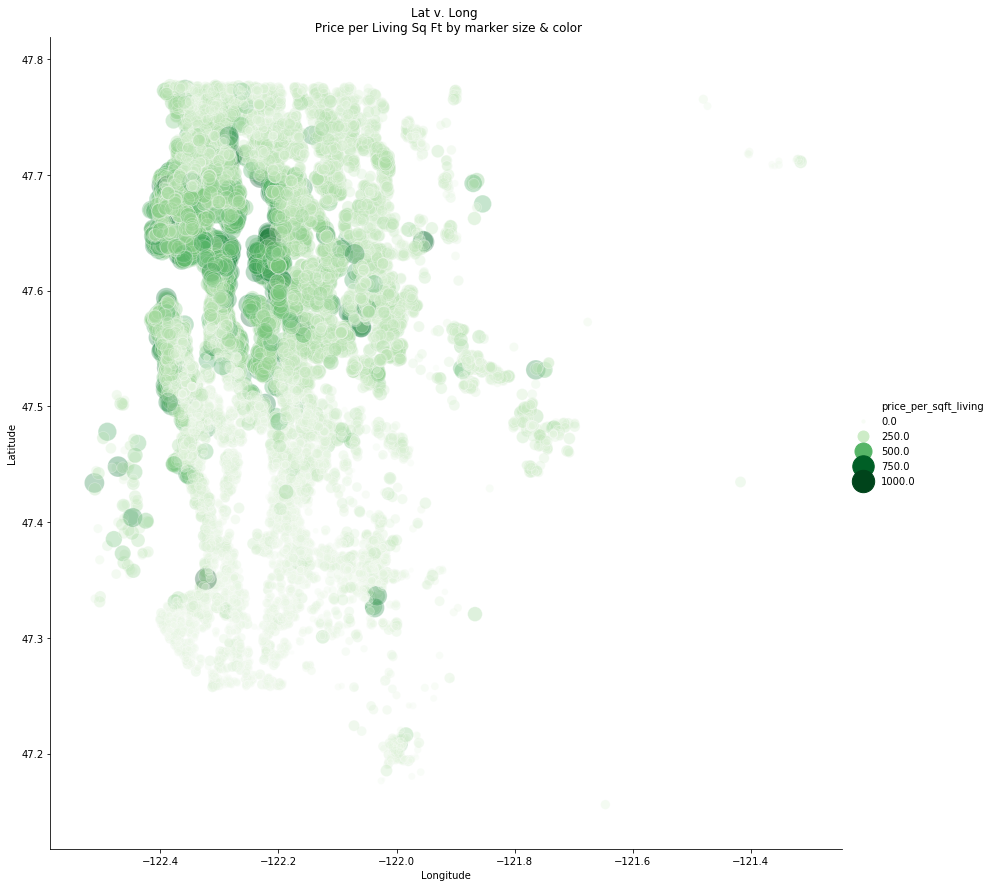

In [13]:
#price per sqft by longitude & latitude
ax = sns.relplot(x = 'long', y = 'lat',
                 hue = 'price_per_sqft_living', palette = 'Greens',
                 size = 'price_per_sqft_living', sizes = (10.0, 500.0),
                 data = df,
                 height =12, 
                 aspect = 1/1,
                 alpha = 0.3)
ax.set(title ='Lat v. Long \n Price per Living Sq Ft by marker size & color',
       xlabel = 'Longitude',
       ylabel = 'Latitude')

Using our Latitude v Longitude scatter plot, we can analyze that prices are highest in Eastside. Prices are generally higher in the northern part than the southern part of the county. When we plot Price per Sq Ft (Living), the pattern persists.

We also notice from the scatter plots that sales price is tend to be higher for properties with the following characteristics:
- Age less than 30 years (if the property is never renovated)
- 4,000-5,000 Living Sq Ft
- 10,000 - 20,000 Lot Sq Ft
- 3-5 Bedrooms
- 3.5-5.5 Bathrooms
- Construction Grade between 9-12
- View rating 3 or higher
- Condition rating between 3-5

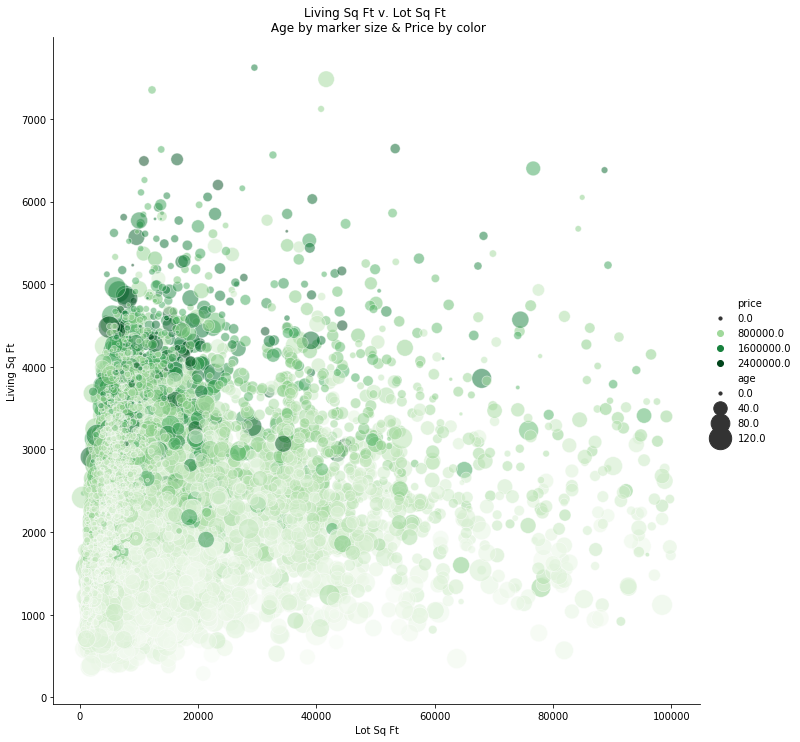

In [14]:
ax = sns.relplot(x = 'sqft_lot', y = 'sqft_living',
                 hue = 'price', palette = 'Greens',
                 size = 'age', sizes = (10.0, 500.0),
                 data = df,
                 height = 10, 
                 aspect = 1/1,
                 alpha = 0.5)
ax.set(title ='Living Sq Ft v. Lot Sq Ft \n Age by marker size & Price by color',
       xlabel = 'Lot Sq Ft',
       ylabel = 'Living Sq Ft')

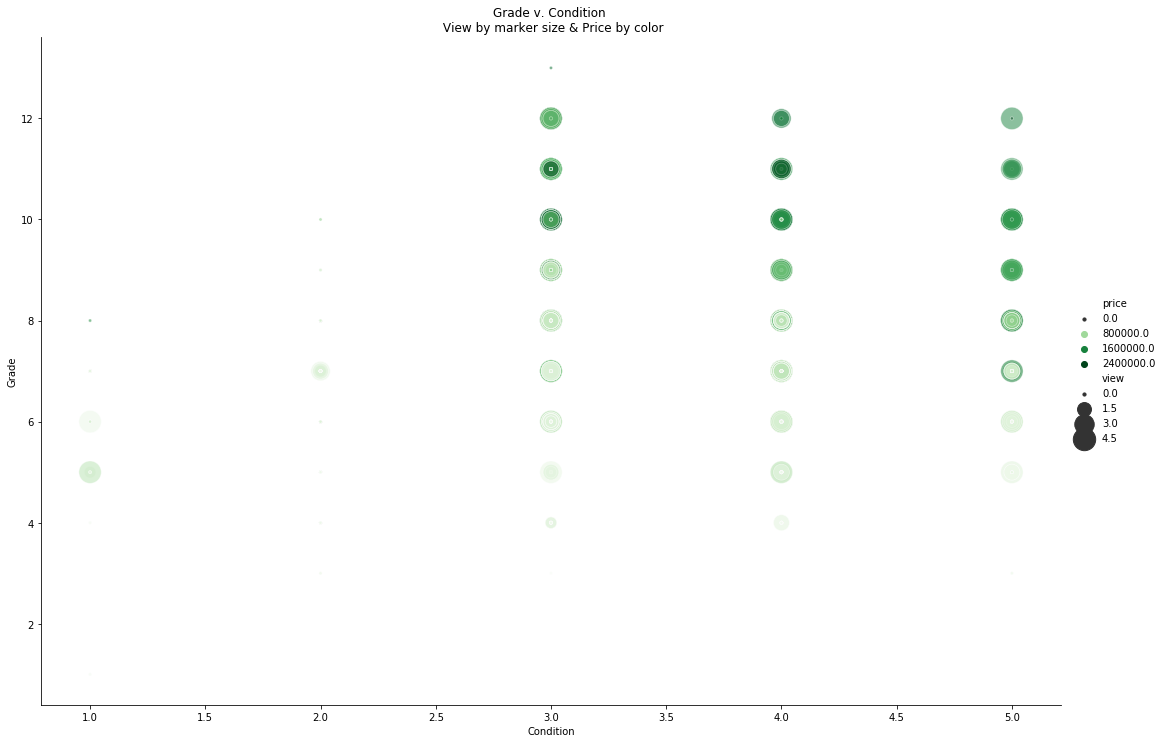

In [15]:
ax = sns.relplot(x = 'condition', y = 'grade',
                 hue = 'price', palette = 'Greens',
                 size = 'view', sizes = (10.0, 500.0),
                 data = df,
                 height = 10, 
                 aspect = 1.5/1,
                 alpha = 0.5)
ax.set(title ='Grade v. Condition \n View by marker size & Price by color',
       xlabel = 'Condition',
       ylabel = 'Grade')

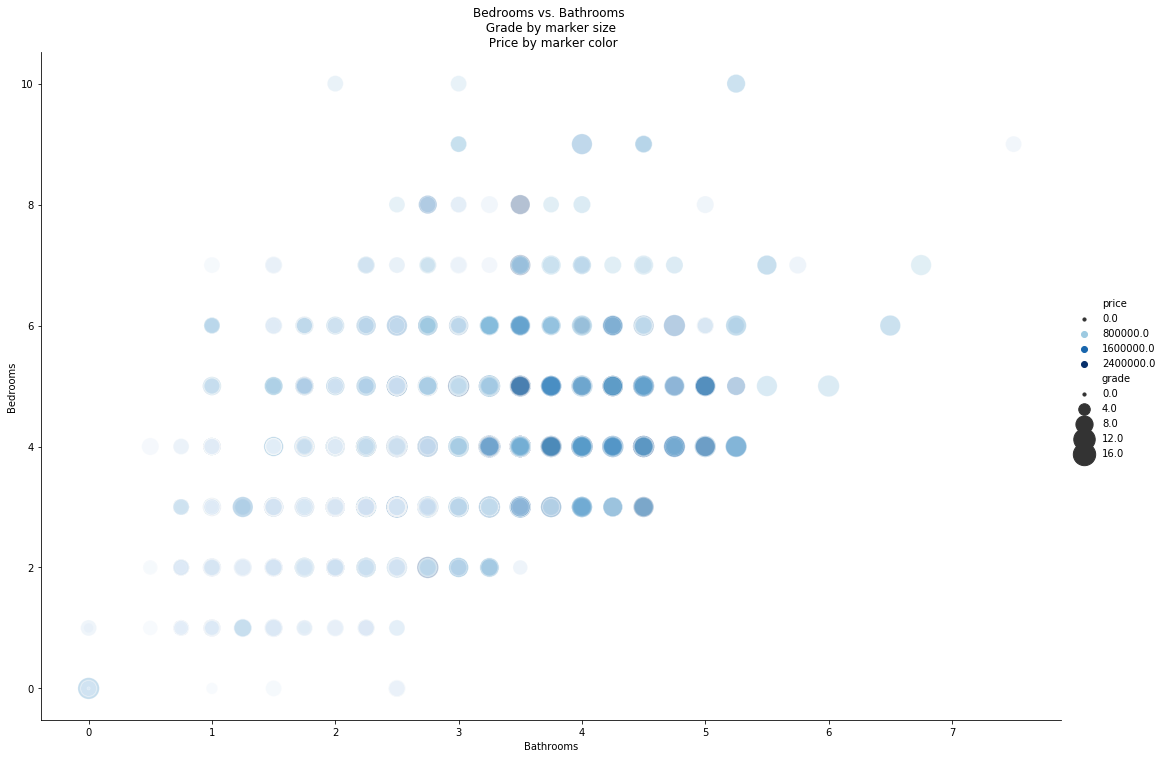

In [16]:
#bedrooms v bathrooms
ax = sns.relplot(x = 'bathrooms', y = 'bedrooms', 
                 hue = 'price', palette = 'Blues',
                 size = 'grade', sizes = (10.0, 500.0),
                 data = df,
                 height = 10, 
                 aspect = 1.5/1,
                 alpha = 0.3)
ax.set(title ='Bedrooms vs. Bathrooms \n Grade by marker size \n Price by marker color',
       xlabel = 'Bathrooms',
       ylabel = 'Bedrooms')

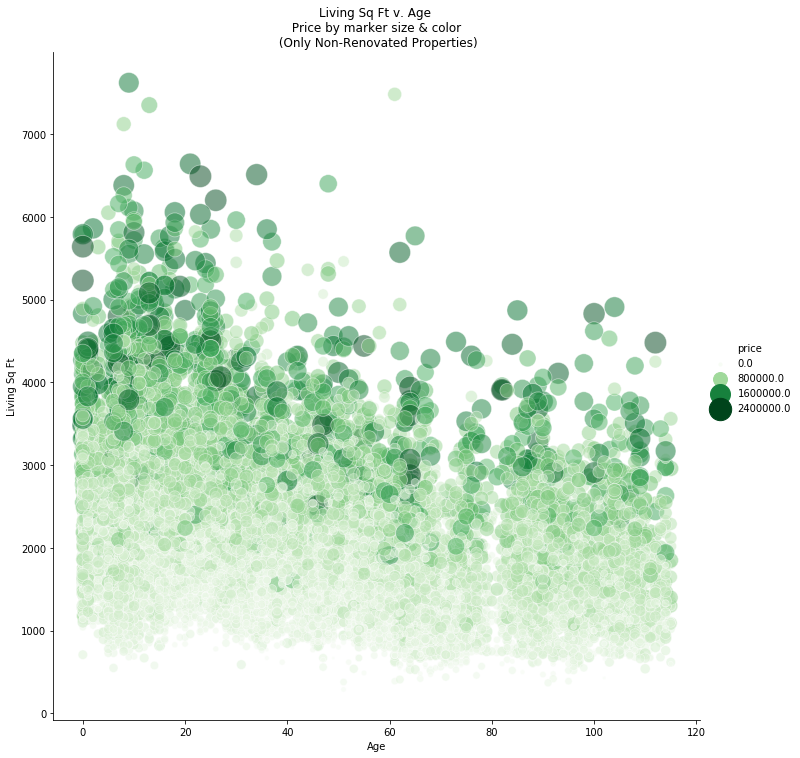

In [17]:
#for non-renovated properties
nonrenov = df[['age', 'price', 'sqft_living', 'grade']].where(df['rnv_age']<=0)


ax = sns.relplot(x = 'age', y = 'sqft_living',
                 hue = 'price', palette = 'Greens',
                 size = 'price', sizes = (10.0, 500.0),
                 data = nonrenov,
                 height = 10, 
                 aspect = 1/1,
                 alpha = 0.5)
ax.set(title ='Living Sq Ft v. Age \n Price by marker size & color \n (Only Non-Renovated Properties)',
       xlabel = 'Age',
       ylabel = 'Living Sq Ft')

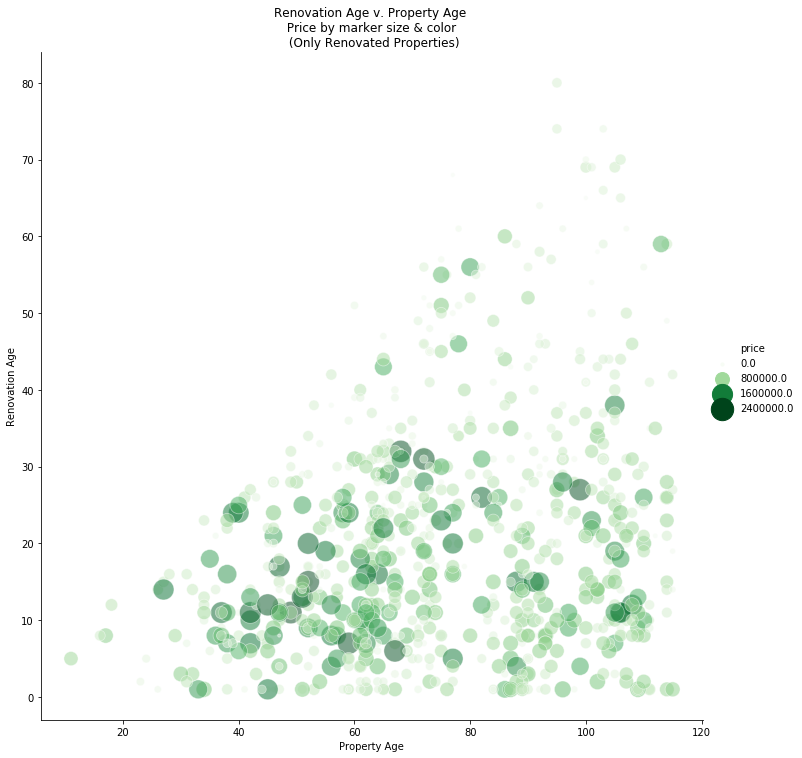

In [18]:
#for renovated properties
renov = df[['age', 'rnv_age', 'price', 'grade']].where(df['rnv_age']>0)

renov['rnv_diff'] = df['age'] - df['rnv_age']

ax = sns.relplot(x = 'age', y = 'rnv_age',
                 hue = 'price', palette = 'Greens',
                 size = 'price', sizes = (10.0, 500.0),
                 data = renov,
                 height = 10, 
                 aspect = 1/1,
                 alpha = 0.5)
ax.set(title ='Renovation Age v. Property Age \n Price by marker size & color \n (Only Renovated Properties)',
       xlabel = 'Property Age',
       ylabel = 'Renovation Age')

### Facet Plots

We also use Facet plots to plot multiple variables to help us compare the price for each variable combination more easily. Lookking at the plots below, we notice that for the same View, Grade and Living Sq Ft size, properties with a waterfront view tend to be sold at a higher price (but not always).

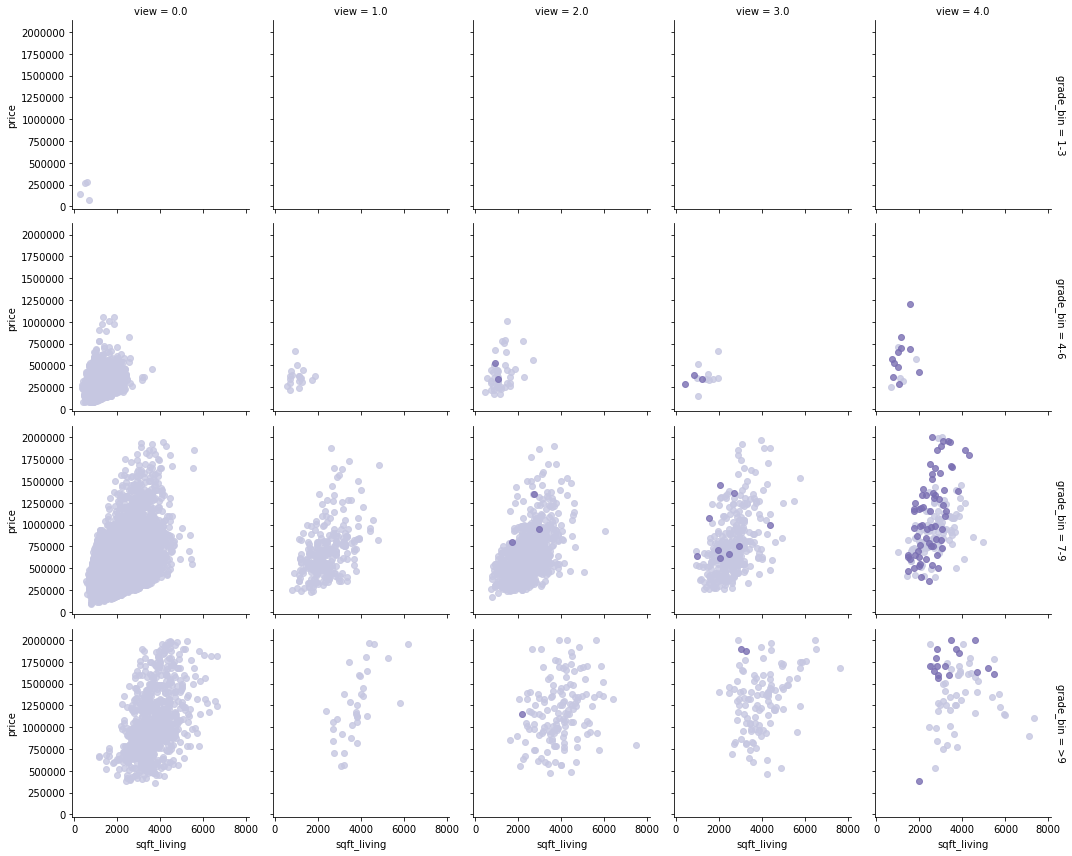

In [19]:
g = sns.FacetGrid(df, col = 'view', 
                  row = 'grade_bin', 
                  hue = 'waterfront', palette="Purples",
                  margin_titles=True)
g.map(sns.regplot, 'sqft_living', 'price', fit_reg = False)

### Pair Plots

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid va

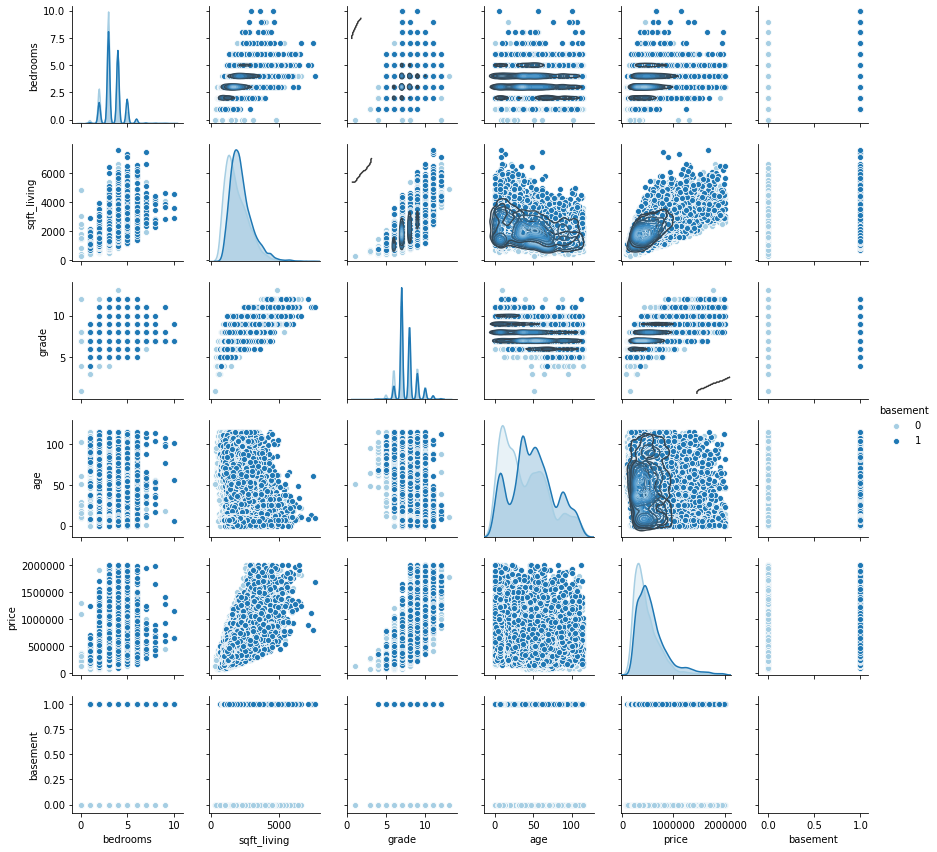

In [20]:
num_cols = ['bedrooms', 'sqft_living', 'grade', 'age', 'price', 'basement'] 
sns.pairplot(df[num_cols], palette="Paired", hue='basement', diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

### Summary

Based on our data exploration using various plotting techniques, we understand that the following variables are good indicators of sales price:
- Positive effect:
    - No. of Bedrooms & Bathrooms
    - Living Sq Ft
    - View & Waterfront Ratings
    - Condition & Grade Ratings
- Negative effect:
    - Age
- Mixed effect (positive effect to a certain point):
    - Lot Sq Ft
    - No. of Floors
    - Basement
    
We're also able to specify the characteristics of a house with a high sales price:
- No. of Bedrooms: 3 - 5
- No. of Bathrooms:3.5 - 5.5
- No. of Floors: 2 - 2.5
- Basement: Yes
- Living Sq Ft: 4,000 - 5,000 sq ft
- Lot Sq Ft: 10,000 - 20,000 sq ft
- View Rating: at least 3
- Waterfront: Yes
- Condition Rating: 3 - 5
- Grade Rating: 9 - 12
- Age: < 30 years old (if the property is never renovated)